In [2]:
# TODO: Create a plot of runs to performance scores and shift the weights of parameters

In [3]:
import pandas as pd
import re

In [4]:
sachin_df = pd.read_csv("C:\\Users\\Sriram Kidambi\\OneDrive\\Documents\\Python\\Data Science Stuff\\cricket_project\\player_data\\SACHIN.csv")

In [5]:
sachin_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match URL,Team Total,Wickets Fallen,Percentage Scored,Match Result
0,0,-,2,0,0,0.00,5,caught,2,v Pakistan,Gujranwala,1989-12-18,https://stats.espncricinfo.com/ci/engine/match...,80,9,0.000000,L
1,0,2,2,0,0,0.00,5,caught,2,v New Zealand,Dunedin,1990-03-01,https://stats.espncricinfo.com/ci/engine/match...,138,10,0.000000,L
2,36,51,39,5,0,92.30,6,caught,1,v New Zealand,Wellington,1990-03-06,https://stats.espncricinfo.com/ci/engine/match...,221,10,16.289593,W
3,10,-,12,0,0,83.33,5,run out,1,v Sri Lanka,Sharjah,1990-04-25,https://stats.espncricinfo.com/ci/engine/match...,241,8,4.149378,L
4,20,-,25,1,0,80.00,7,caught,2,v Pakistan,Sharjah,1990-04-27,https://stats.espncricinfo.com/ci/engine/match...,209,10,9.569378,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,14,34,15,2,0,93.33,2,run out,2,v Australia,Sydney,2012-02-26,https://stats.espncricinfo.com/ci/engine/match...,165,10,8.484848,L
448,39,45,30,5,0,130.00,2,lbw,2,v Sri Lanka,Hobart,2012-02-28,https://stats.espncricinfo.com/ci/engine/match...,321,3,12.149533,W
449,6,25,19,1,0,31.57,2,caught,1,v Sri Lanka,Mirpur,2012-03-13,https://stats.espncricinfo.com/ci/engine/match...,304,3,1.973684,W
450,114,205,147,12,1,77.55,2,caught,1,v Bangladesh,Mirpur,2012-03-16,https://stats.espncricinfo.com/ci/engine/match...,289,5,39.446367,L


The performance metric we will be using is:

Performance Metric = (Runs Scored^2 * Strike Rate^0.5 * Partnership Score * Not-Out Bonus * Contextual Factor) / (Total Wickets Fallen * Innings Duration * Average Innings Duration)

Contextual Factor = 1 + (Number of Wickets Fallen / Runs Scored by the Team)

Notes:
* For Not-Out Bonus, if the batsmen remains not out at the end of the innings, then this will be 1.1 or 1.2, else 1
* For contextual factor, it is number and runs before the batsman in question comes out.

In [6]:
foo_match = pd.read_html(sachin_df.iloc[20]["Match URL"])

In [7]:
# Innings = 2 -> Index 2
# Innings = 1 -> Index 0
fow = foo_match[2].drop(foo_match[2].columns[-2:], axis = 1).dropna().iloc[-1]["BATTING"]

In [8]:
fow

'Fall of wickets: 1-0 (Desmond Haynes), 2-23 (Philo Wallace), 3-25 (Richie Richardson), 4-55 (Carl Hooper), 5-55 (Keith Arthurton), 6-61 (Brian Lara), 7-69 (David Williams), 8-76 (Malcolm Marshall), 9-113 (Curtly Ambrose), 10-126 (Anderson Cummins)'

In [9]:
foo_match[2].drop(foo_match[2].columns[-2:], axis = 1).dropna().iloc[:-1]

,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,Desmond Haynes,c †More b Kapil Dev,0,1,1,0,0,0.00
1,Philo Wallace,b Prabhakar,11,33,31,0,0,33.33
2,Richie Richardson (c),c †More b Kapil Dev,12,28,35,0,0,42.85
3,Brian Lara,c †More b Banerjee,14,38,57,1,0,36.84
4,Carl Hooper,b Srinath,12,27,35,1,0,44.44
5,Keith Arthurton,b Srinath,0,1,1,0,0,0.00
6,Malcolm Marshall,c †More b Banerjee,7,36,39,0,0,19.44
7,David Williams †,c Srikkanth b Banerjee,5,7,7,0,0,71.42
8,Curtly Ambrose,run out,17,25,47,1,1,68.00
9,Anderson Cummins,c Azharuddin b Tendulkar,24,43,52,2,0,55.81


In [10]:
scorecard = foo_match[2]

In [11]:
scorecard_2 = pd.read_html(sachin_df.iloc[24]["Match URL"])[2]

In [12]:
scorecard.drop(foo_match[2].columns[-2:], axis = 1).dropna().iloc[:-1]

,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,Desmond Haynes,c †More b Kapil Dev,0,1,1,0,0,0.00
1,Philo Wallace,b Prabhakar,11,33,31,0,0,33.33
2,Richie Richardson (c),c †More b Kapil Dev,12,28,35,0,0,42.85
3,Brian Lara,c †More b Banerjee,14,38,57,1,0,36.84
4,Carl Hooper,b Srinath,12,27,35,1,0,44.44
5,Keith Arthurton,b Srinath,0,1,1,0,0,0.00
6,Malcolm Marshall,c †More b Banerjee,7,36,39,0,0,19.44
7,David Williams †,c Srikkanth b Banerjee,5,7,7,0,0,71.42
8,Curtly Ambrose,run out,17,25,47,1,1,68.00
9,Anderson Cummins,c Azharuddin b Tendulkar,24,43,52,2,0,55.81


In [13]:
# Get team total
final_score = scorecard[scorecard["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")
total_score = int(final_score[0])
print(total_score)

126


In [14]:
fow_list = fow.split(":")[-1].split(",")

In [15]:
player_list = foo_match[2]["BATTING"].tolist()
for i, player in enumerate(player_list):
    if "\xa0" in player:
        player_list[i] = player_list[i].split("\xa0")[0]
player_list

['Desmond Haynes',
 'Philo Wallace',
 'Richie Richardson',
 'Brian Lara',
 'Carl Hooper',
 'Keith Arthurton',
 'Malcolm Marshall',
 'David Williams',
 'Curtly Ambrose',
 'Anderson Cummins',
 'Patrick Patterson',
 'Extras',
 'TOTAL',
 'Fall of wickets: 1-0 (Desmond Haynes), 2-23 (Philo Wallace), 3-25 (Richie Richardson), 4-55 (Carl Hooper), 5-55 (Keith Arthurton), 6-61 (Brian Lara), 7-69 (David Williams), 8-76 (Malcolm Marshall), 9-113 (Curtly Ambrose), 10-126 (Anderson Cummins)']

In [16]:
fow_list

[' 1-0 (Desmond Haynes)',
 ' 2-23 (Philo Wallace)',
 ' 3-25 (Richie Richardson)',
 ' 4-55 (Carl Hooper)',
 ' 5-55 (Keith Arthurton)',
 ' 6-61 (Brian Lara)',
 ' 7-69 (David Williams)',
 ' 8-76 (Malcolm Marshall)',
 ' 9-113 (Curtly Ambrose)',
 ' 10-126 (Anderson Cummins)']

In [17]:
for wicket in fow_list:
    for name in player_list:
        if name in wicket:
            print(wicket)

 1-0 (Desmond Haynes)
 2-23 (Philo Wallace)
 3-25 (Richie Richardson)
 4-55 (Carl Hooper)
 5-55 (Keith Arthurton)
 6-61 (Brian Lara)
 7-69 (David Williams)
 8-76 (Malcolm Marshall)
 9-113 (Curtly Ambrose)
 10-126 (Anderson Cummins)


Develop "create partnership table" function

Function should be able to take a batting innings table and construct the partnership by telling:
* Wicket Number
* Partnership Runs 
* Names of the Batsmen

In [18]:
def get_innings_batting_list(scorecard):
    scorecard.dropna(subset=["BATTING"], inplace=True)
    scorecard.reset_index(drop=True, inplace=True)
    extras_index = scorecard[scorecard["BATTING"].str.contains(pat = r"EXTRAS", flags = re.IGNORECASE)].index[0]
    scorecard = scorecard.drop(scorecard.columns[-2:], axis = 1).dropna()
    filtered_scorecard = scorecard.iloc[:extras_index]
    players_list = filtered_scorecard["BATTING"].tolist()
    for i, player in enumerate(players_list):
        if "\xa0" in player:
            players_list[i] = players_list[i].split("\xa0")[0]

    return players_list

In [19]:
def get_fall_of_wicket(scorecard):
    scorecard = scorecard.drop(scorecard.columns[-2:], axis = 1).dropna()
    fow = scorecard[scorecard["BATTING"].str.contains(pat = r"Fall of Wickets", flags = re.IGNORECASE)]["BATTING"].tolist()
    if len(fow) != 0:
        fow = ("").join(fow)
        fow = fow.split(":")[-1].split(",")
        
    return fow

In [20]:
def get_batting_pairs(batting_partners, fow_list, player_list):
    for i, (batsman_1, batsman_2) in enumerate(start=2, iterable = batting_partners):
        if batsman_1 in fow_list[i-2]:
            batting_partners.append((player_list[i], batsman_2))
        else:
            batting_partners.append((batsman_1, player_list[i]))
            
        if i == len(player_list)-1:
            break
    
    return batting_partners

In [21]:
get_fall_of_wicket(scorecard_2)

[' 1-10 (David Boon)',
 ' 2-17 (Geoff Marsh)',
 ' 3-154 (Allan Border)',
 ' 4-156 (Tom Moody)']

In [22]:
# Getting the batsmen involved in the partnerships
# Get a list of tuples for the two batsmen involved at every partnership

def get_partnerships(scorecard):
    player_list = get_innings_batting_list(scorecard)
    batting_partners = []
    batting_partners.append((player_list[0], player_list[1]))

    # Get the fall of wickets
    fow_list = get_fall_of_wicket(scorecard)

    # print("BATTING PARTNERS:", batting_partners)
    if len(fow_list) > 0:
        # Get the list of tuples
        batting_partners = get_batting_pairs(batting_partners, fow_list, player_list)

    return batting_partners

In [23]:
def get_wickets_and_runs(scorecard):
    fow_list = get_fall_of_wicket(scorecard)

    wickets = []
    runs = []

    if len(fow_list) == 0:
        total_score = int(scorecard[scorecard["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")[0])
        wickets.append("1")
        runs.append(total_score)

        return runs, wickets

    for wicket in fow_list:
        # print(re.findall(r"\d\d?-\d+", wicket))
        fow_w_r = re.findall(r"\d\d?-\d+", wicket)
        if len(fow_w_r) == 0:
            continue
        else:
            fow_w_r = fow_w_r[0]
            fow_w_r = fow_w_r.split("-")
            wickets.append(fow_w_r[0])
            runs.append(int(fow_w_r[1]))
            
    return runs, wickets

In [24]:
def get_partnership_scores(wickets, runs, scorecard):
    final_score = scorecard[scorecard["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")
    total_score = int(final_score[0])
 
    partnership_scores = []
    out_or_not = []

    current_run = 0
    for run in runs:
        partnership_scores.append(run - current_run)
        current_run = run
        if current_run == total_score:
            out_or_not.append("NOT OUT")
        else:
            out_or_not.append("OUT")
    if runs[-1] < total_score:
        partnership_scores.append(total_score - runs[-1])
        wickets.append(str(len(wickets)+1))
        out_or_not.append("NOT OUT")

    # print(partnership_scores, out_or_not)
    return partnership_scores, out_or_not

In [25]:
def get_partnership_table(scorecard):
    partnership_dict = {}

    runs, wickets = get_wickets_and_runs(scorecard)
    # print("Runs", runs)
    partnership_scores, out_or_not = get_partnership_scores(wickets, runs, scorecard)
    # print("PARTNERSHIP SCORES:", partnership_scores)

    partnership_dict["Wicket"] = wickets
    partnership_dict["Partnership"] = partnership_scores
    partnership_dict["Out or Not"] = out_or_not

    partnerships_df = pd.DataFrame.from_dict(partnership_dict)
    batting_partners = get_partnerships(scorecard)

    # print("BATTING PARTNERS:", batting_partners)
    partnerships_df[['Batsman 1','Batsman 2']] = pd.DataFrame(batting_partners)

    return partnerships_df

Get performance rating

For performance metric I need:
* Runs Scored
* Strike Rate
* Partnership Score
* Not Out-Bonus (1.1 or 1.2)
* Contextual Factor 
    * 1 + (Number of Wickets Fallen / Runs Scored by the Team)
* Total Wickets Fallen 
* Innings Duration
* Average Innings Duration

In [26]:
def get_partnership_metric(scorecard, player):
    partnership_table = get_partnership_table(scorecard)
    # print("PARTNERSHIP:",partnership_table)
    partnerships = partnership_table[(partnership_table["Batsman 1"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)) | (partnership_table["Batsman 2"].str.contains(pat = rf"{player}", flags = re.IGNORECASE))]
    total_partnership_runs = partnerships["Partnership"].sum()

    return total_partnership_runs

In [27]:
def get_contextual_factor(scorecard, player):
    partnership_table = get_partnership_table(scorecard)
    # print(partnership_table)
    partnerships = partnership_table[(partnership_table["Batsman 1"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)) | (partnership_table["Batsman 2"].str.contains(pat = rf"{player}", flags = re.IGNORECASE))]
    # print(partnerships)
    batsman_index = partnerships.index[0]
    if batsman_index == 0 or batsman_index == 1:
        return 1
    
    previous_batsmen = partnership_table.iloc[:batsman_index]
    wickets_fallen = len(previous_batsmen.index)
    runs_scored = previous_batsmen["Partnership"].sum()

    contextual_factor = 1 + (wickets_fallen/runs_scored)
    return contextual_factor

In [28]:
def get_innings_durations(scorecard, player):
    partnership_table = get_partnership_table(scorecard)
    partnerships = partnership_table[(partnership_table["Batsman 1"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)) | (partnership_table["Batsman 2"].str.contains(pat = rf"{player}", flags = re.IGNORECASE))]
    total_wickets_fallen = len(partnerships.index)
    extras_index = scorecard[scorecard["BATTING"].str.contains(pat = r"EXTRAS", flags = re.IGNORECASE)].index[0]
    # print("ORIGINAL:",scorecard)
    # print(len(scorecard.index))
    # print(extras_index)
    filtered_scorecard = scorecard.drop(foo_match[2].columns[-2:], axis = 1).iloc[:extras_index].dropna()
    # print("FILTERED:",filtered_scorecard)
    average_innings_duration = filtered_scorecard["B"].astype("int").mean()

    return total_wickets_fallen, average_innings_duration
    

In [43]:
# Given a batsman name give me their performance ratings
runs = []
performance_scores = []

for index, row in sachin_df.iterrows():
    # print(index)
# row = sachin_df.iloc[73]
    match_card = pd.read_html(row["Match URL"])

    player = "SACHIN"

    if row["Inns"] == 1:
        scorecard = match_card[0]
    else:
        scorecard = match_card[2]

    fow_list = get_fall_of_wicket(scorecard)
    scorecard_truncated = scorecard.drop(scorecard.columns[-2:], axis = 1).dropna().iloc[:-1]

    runs_scored = int(scorecard_truncated[scorecard_truncated["BATTING"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)]["R"].iloc[0])
    strike_rate = float(scorecard_truncated[scorecard_truncated["BATTING"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)]["SR"].iloc[0])
    partnership_score = get_partnership_metric(scorecard, player)

    not_out_bonus = 1.1
    for item in fow_list:
        if player.capitalize() in item:
            not_out_bonus = 1

    contextual_factor = get_contextual_factor(scorecard, player)

    innings_duration = int(scorecard_truncated[scorecard_truncated["BATTING"].str.contains(pat = rf"{player}", flags = re.IGNORECASE)]["B"].iloc[0])
    total_wickets_fallen, average_innings_duration = get_innings_durations(scorecard, player)

    performance_metric = ((runs_scored**2)*(strike_rate**(0.5))*partnership_score*not_out_bonus*contextual_factor)/(total_wickets_fallen*innings_duration*average_innings_duration)
    # print(runs_scored, strike_rate, partnership_score, not_out_bonus, contextual_factor, innings_duration, total_wickets_fallen)
    # print(performance_metric)
    runs.append(runs_scored)
    performance_scores.append(performance_metric)



In [44]:
import matplotlib.pyplot as plt
import numpy as np

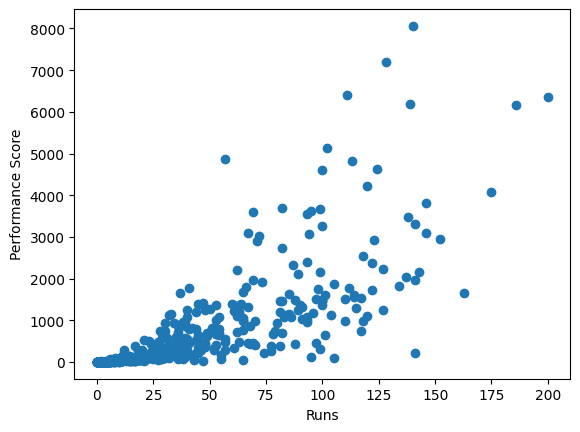

In [45]:
plt.scatter(runs, performance_scores)
plt.xlabel("Runs")
plt.ylabel("Performance Score")
plt.show()

In [50]:
highest_performance_index = np.argmax(performance_scores)
print(highest_performance_index)
runs[highest_performance_index]

205


140

In [56]:
list(zip(runs, performance_scores))

[(0, 0.0),
 (0, 0.0),
 (36, 439.0438608509408),
 (10, 48.985085425651356),
 (20, 210.24090570639888),
 (19, 57.209119260115685),
 (31, 571.7352087723438),
 (36, 878.4701841889955),
 (53, 1367.6356248984102),
 (30, 344.1841889066498),
 (4, 4.949573607826479),
 (53, 659.3823518357586),
 (52, 752.2137411335798),
 (22, 74.04811415201266),
 (11, 28.02696816355529),
 (49, 684.3056632692198),
 (0, 0.0),
 (62, 1105.574079297156),
 (4, 5.555528370023459),
 (1, 0.09663543517204358),
 (1, 0.0900347656636745),
 (36, 74.79613820760153),
 (57, 466.73604274806684),
 (48, 356.15301632035477),
 (21, 179.53633002246772),
 (77, 382.2383641609185),
 (31, 210.420137839318),
 (57, 287.5029861983629),
 (4, 3.1653330009028418),
 (69, 443.2870127966618),
 (35, 597.758551773468),
 (11, 64.72586763442354),
 (54, 688.357072464932),
 (81, 1208.9295337733702),
 (4, 4.276980315484696),
 (84, 1137.119150901369),
 (14, 151.43135345666988),
 (39, 966.3378122749475),
 (15, 34.70805752478351),
 (10, 6.346484194955365),
 

In [54]:
pd.read_html(sachin_df.iloc[highest_performance_index]["Match URL"])[0]

,BATTING,Unnamed: 1,R,B,M,4s,6s,SR,Unnamed: 8,Unnamed: 9
0,Sadagoppan Ramesh,run out (Tikolo),44,66,97,7,0,66.66,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sourav Ganguly,lbw b Suji,13,26,53,3,0,50.00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rahul Dravid,not out,104,109,158,10,0,95.41,NaN,NaN
5,Sachin Tendulkar,not out,140,101,114,16,3,138.61,NaN,NaN
6,Extras,"(lb 5, nb 2, w 21)",28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TOTAL,50 Ov (RR: 6.58),329/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...","Did not bat: Mohammad Azharuddin (c), Ajay Jad...",NaN
9,"Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...","Fall of wickets: 1-50 (Sourav Ganguly, 10.4 ov...",NaN


(array([327.,  71.,  23.,   9.,   9.,   5.,   2.,   4.,   1.,   1.]),
 array([   0.        ,  806.05761485, 1612.11522971, 2418.17284456,
        3224.23045942, 4030.28807427, 4836.34568913, 5642.40330398,
        6448.46091883, 7254.51853369, 8060.57614854]),
 <BarContainer object of 10 artists>)

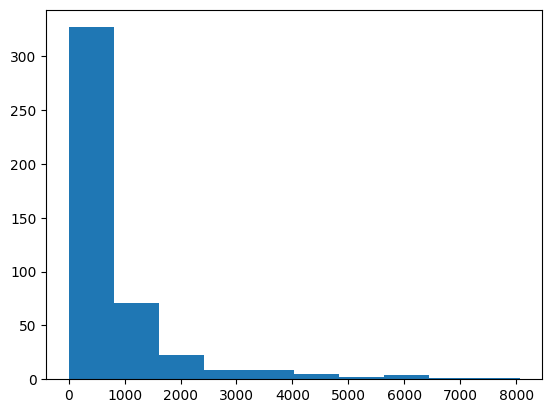

In [47]:
plt.hist(performance_scores)

(array([185.,  91.,  53.,  38.,  36.,  24.,  13.,   8.,   2.,   2.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

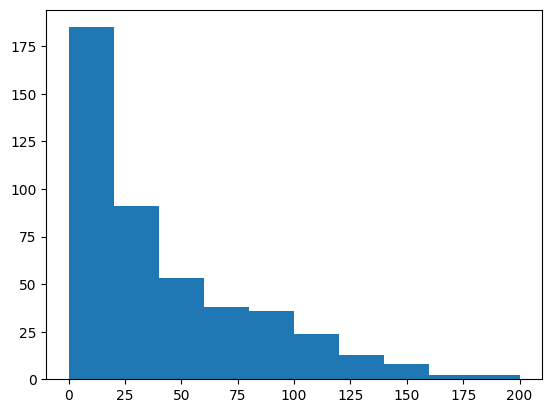

In [48]:
plt.hist(runs)